In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from statistics import mean, median, mode

In [2]:
df_train = pd.read_csv(f'../../../code-mixed-enma/hasoc_task_1/ml-Hasoc-offensive-train.csv', sep='\t', header=None)
df_train.head()

,0,1
0,Not_offensive,Ithu ikkayude script aanu.. Uttopiya
1,Not_offensive,Varunnathu manthriyo bhadano alla rajavanu ra...
2,Not_offensive,ഇഷ്ടമാണ്. But ചില സിനിമയിൽ over actigalle എന്...
3,Not_offensive,enna look a rajuettaaaaa............ promisin...
4,Offensive,ഇത് മൂഞ്ചും ഉറപ്പ് എന്ത് ഊള ട്രൈേലർ


In [3]:
df_train.shape

(3200, 2)

In [4]:
df_dev = pd.read_csv(f'../../../code-mixed-enma/hasoc_task_1/ml-Hasoc-offensive-dev.csv', sep='\t', header=None)
df_dev.head()

,0,1
0,Offensive,നല്ല ഊമ്പിയ bgm ടു ട്ടു ടു ട്ടൂ...
1,Offensive,Lucifer njngal randum kayyum neeti sweekarich...
2,Not_offensive,Evideo oru Hollywood story varunnilleee. Oru ...
3,Not_offensive,ithre ullo mattavanmarude power 🤣🤣🤣 dislike d...
4,Not_offensive,Prathi poovan kozhi teaser kandittu


In [5]:
df_dev.shape

(400, 2)

In [6]:
df_test = pd.read_csv(f'../../../code-mixed-enma/hasoc_task_1/ml_mixedscript_Hascoc_offensive_test_without_label - ml_mixedscript_Hascoc_offensive_test_without_label.csv', header=None)
df_test.head()

,0,1
0,ml_1,Theatoril climax maathram kaanichal mathiyallo...
1,ml_2,Shah Rukh Khan inte FAN cinema de cheriya samy...
2,ml_3,Heavy Stills onnum oru rekshem illa adipoli fd...
3,ml_4,Eee trailer njan ethra pravishyam nokiyann eni...
4,ml_5,Ikka ethu engane sathikunu enna oru mass I lov...


In [7]:
df_test.shape

(400, 2)

In [18]:
import unicodedata as ud

latin_letters= {}

def is_latin(uchr):
    try: return latin_letters[uchr]
    except KeyError:
         return latin_letters.setdefault(uchr, 'LATIN' in ud.name(uchr))

def only_roman_chars(unistr):
    return all(is_latin(uchr)
           for uchr in unistr
           if uchr.isalpha()) # isalpha suggested by John Machin

In [9]:
count = 0
for index, row in df_train.iterrows():
    if not only_roman_chars(row[1]):
        print(index, row[0], row[1])
        print('\n\n')
        count +=1
print(count)

2 Not_offensive   ഇഷ്ടമാണ്. But ചില സിനിമയിൽ over actigalle എന്ന് തോന്നും..



4 Offensive  ഇത് മൂഞ്ചും ഉറപ്പ്  എന്ത് ഊള ട്രൈേലർ



6 Not_offensive   സുരാജേട്ടന് കോമഡി മാത്രമല്ല സീരിയസ് റോളുകളും വഴങ്ങുമെന്ന് പുള്ളി വീണ്ടും വീണ്ടും തെളിയിച്ചു കൊണ്ടിരിക്കുവാണല്ലോ



7 Not_offensive   ഇത് Unni R ന്റെ 'സങ്കടം' എന്ന ചെറുകഥയാണെന്ന് തോന്നുന്നു



8 Not_offensive   ട്രാക്ക് കൊള്ളില്ല അതു മാറ്റാൻ shine nigam ആക്ഷൻ കാണിക്കുന്നത് track.inte T 



12 Not_offensive   ഒരു പക്ഷേ ഈ പടത്തിൽ രാജുവേട്ടനെക്കാൾ കയ്യടി സുരാജേട്ടനായിരിക്കാം....



14 Not_offensive   മോഹൻലാൽ ഫാനൊന്നുമല്ല. But Trailer soooper.  രാജുവേട്ടന്റെ first padam hit aavatte katta waiting



17 Not_offensive   Eee padam pwolikum..... Aah വിശ്വാസം anu eee comnt



18 Not_offensive   മഞ്ജു ചേച്ചിയുടെ ശക്തമായ കഥാപാത്രം വീണ്ടും അവതരിക്കുന്നു



22 Not_offensive   മമ്മൂട്ടി അത്ഭുതമനുഷ്യൻ തന്നെ. ഈ പ്രായത്തിൽ ഈ ലുക്കിൽ ഈ എനര്ജിയിൽ പെർഫോം ചെയ്ത ചരിത്രം ലോകസിനിമാ സാംസ്കാരിക ദൃശ്യകലാമേഖലകളിൽ എവിടെയും ഇല്ല



24 Not_offensive   Tralier കണ്ടപ്പോൾ ക

1104 Not_offensive   Ratchasan bgm അടിച്ചു മാറ്റിയ ഗോപി സുന്ദര്‍



1105 Not_offensive   All the best മഞ്ജു ചേച്ചി



1106 Not_offensive   Sharukh khante Fan മൂവി ഓർമ വന്നവരുണ്ടോ



1107 Not_offensive   ഇതിൽ പൃഥ്വി രാജ് വില്ലൻ ക്യാരക്ടർ ആയിരിക്കും cheyunne2



1110 Not_offensive   ഫഹദ് വേറെ ലെവലാണ് ഭായ്.സൗബിൻ ചേട്ടോ നിങ്ങള് മുത്താണ്.



1111 Offensive  ഇപ്പഴേ വന്നു തീട്ടങ്ങൾ ഡിസ്‌ലൈക്ക് അടിക്കാൻ തുടങ്ങി.. 🤣🤣🤣



1113 Not_offensive   ചീറി.... വേറെ വാക്ക് ഇല്ല..  ജ്ജാദി  ടാവ്‌ ഇഷ്ട്ടാ....  ചിരിയിലും കലിപ്പ്...



1114 Not_offensive   ഉണ്ണി.ആർ എഴുതിയ സങ്കടം എന്ന ചെറുകഥ അടിസ്ഥാനമാക്കിയ സിനിമയാണോ? ട്രേയ്ലർ കണ്ടപ്പോൾ അങ്ങനെ തോന്നുന്നു



1116 Not_offensive   ഇത് കണ്ടപ്പോ ഷാരൂഖിന്റെ ഫാൻ movie ആണ് ഓർമ വന്നത്... ബട്ട്‌ രാജുവേട്ടനും സുരാജേട്ടനും കലക്കും!!!



1118 Not_offensive   ഈ നല്ല സിനിമ മലയാളത്തിനു സമ്മാനിച്ച പ്രിയ കലാകാരന്മാർക്  എന്റെ ഹൃദയം നിറഞ്ഞ നന്ദി അറീക്കുന്നു



1120 Offensive  എന്തോന്ന് വാസു അണ്ണാ ഇത്.. പെട്ടിയും എടുത്ത് വല്ലോ ആന്ധ്രയില്ലോ തമിഴ്നാട്ടില്ലോ പോ.



1124 Not_offensive 

2275 Not_offensive   രാജാധിരാജ & മാസ്‌റ്റർപീസ്  പോലെ ശോകം പടം ആകാതിരുന്നാൽ മതിയാരുന്നു  ഇക്കായുടെ പുതിയ അവതാരത്തിനു  വിജയാശംസകൾ



2280 Offensive  ട്രെയിലർ കൊള്ളാം... പക്ഷേ പക്ഷേ ആ ഊള  അലൻസിയർ മാത്രം വേണ്ടായിരുന്നു.. ഇതുപോലുള്ള വൃത്തികെട്ട അവന്മാരെ വളർത്തുന്ന മലയാള സിനിമയുടെ പ്രവണത നിർത്തണം....



2281 Not_offensive   ഓരോ പടം കഴിയുമ്പോഴും സുരാജേട്ടന്റെ ലെവല് മാറിക്കൊണ്ടിരിക്കുവാണല്ലോ...



2283 Offensive  Trailer video പോലും പുറത്ത് വരുന്നതിനു മുന്നേ dislike program ആരംഭിച്ച മക്കൾക്കിരിക്കട്ടെ ഒരു നടുവിരൽ നമസ്കാരം!!!



2284 Not_offensive   കഥ ട്രെയ്ലറിൽ തന്നെ ഉണ്ടല്ലോ. സുരാജ് പ്രിതി combo കിടിലൻ ആകട്ടെ



2286 Not_offensive   എനിക്ക് ഒരു 5 ലൈക്ക് തരുമോ ചങാതികളേ....................PŁĘÅŚĖ



2290 Offensive  മഞ്ജു ചേച്ചി ഇസ്സ്തം ...  കോവാലൻ കസ്സ്തം ...



2292 Offensive  ഈ ജാഡ അഭിനയം വിനീതിന്റെ സൽപ്പേര് കളയും. over acting എന്നാൽ ഇതാണ്. ബോറൻ .അല്ലേപ്പിന്നെ ഇങ്ങനൊരു സീൻ അഭിനയിക്കാൻ വരുമോ. പാടുന്നുണ്ടല്ലോ.അതു പോരെ കാശുണ്ടാക്കാൻ?



2298 Not_offensive   ഇതിന്റെ ഇടയിൽ  Avengers ine കണ്ടവർ lik

In [11]:
1-1062/3200

0.6681250000000001

In [12]:
count = 0
for index, row in df_dev.iterrows():
    if not only_roman_chars(row[1]):
        print(index, row[0], row[1])
        print('\n\n')
        count +=1
print(count)

0 Offensive  നല്ല ഊമ്പിയ bgm ടു ട്ടു ടു ട്ടൂ...



6 Not_offensive   മൂഡ് പോയി മൂഡ് പോയി



9 Not_offensive   ഇത് പൊളിക്കും എന്ന് അഭിപ്രായമുള്ളവർ ലൈക്ക്ഞാൻ നേരത്തെ ലൈക്കി



12 Not_offensive   പത്രം ഫിലിമിലെ ആ മഞ്ചു ചേച്ചിന്റെ ഒരു പവർ കാണുന്നപോലെ....  ലേഡി സൂപ്പർസ്റ്റാർ ശരിക്കും ഈ ഈ ഈ ഈ ഈ മൊതലാണേ



18 Not_offensive   Lalu Alex  അദേഹത്തിന്റെ ഒരു തിരിച്ച് വരവ് കാത്തിരിക്കുകയായിരുന്നു



19 Not_offensive   പുതിയ ഒരു യൂട്യൂബ് ചാനൽ ആണ് എല്ലാവരുടെയും സപ്പോര്ത് പ്രതീക്ഷിക്കുന്നു  എല്ലാവരും support ചെയ്യുമല്ലോ അല്ലെ



20 Not_offensive   Bgm ഒരേ പൊളി..  Gopi Sundar



21 Not_offensive   നൈല ചേച്ചി



25 Not_offensive   ഈ സിനിമ കണ്ടിട്ട് ഷാരുഖാനറെ ഫാൻ സിനിമ ഓര്മവന്നവർ  ഉണ്ടോ



26 Not_offensive   മഞ്ജുച്ചേച്ചി കട്ട ഫാൻസ്‌ ഇവിടെ കമ്മോൺ



27 Not_offensive   Big brother triler ഇറങ്ങി ഒരു മണിക്കൂർ കഴിഞ്ഞപ്പോൾ 2.3k ഡിസ്‌ലൈക് .... Shylock trailer ഇറങ്ങി 21 മണിക്കൂർ കഴിയുമ്പോളും വെറും 4.6k ഡിസ്‌ലൈക്ക് ........... ഇക്കാ ഫാൻസ്‌ like here



30 Offensive  നാണമുണ്ടോടാ ചെറ്റകളെ ഇമ്മാതിരി ഊള പരിപാടി കാണിക

In [13]:
1 - count/len(df_dev)

0.7025

In [14]:
count = 0
for index, row in df_test.iterrows():
    if not only_roman_chars(row[1]):
        print(index, row[0], row[1])
        print('\n\n')
        count +=1
print(1 - count/len(df_test))

8 ml_9 അപ്പൊ ഇതൊരൊന്നൊരാ മൊതലാണല്ലേ  Suraj ആണ് നടൻ ന്ന് തോന്നുന്നു



9 ml_10 പുത്തൻ പണം 2...  2020 ലെ ആദ്യത്തെ ബോംബ് ഇക്ക ഇങ്ങെടുക്കുവാ 🤣🤣 എജ്ജാതി തീട്ടം



10 ml_11 ലാലു jr ഫാൻസ്‌ അടി ലൈക്



12 ml_13 മമ്മുക്കയുടെ shylock ന് ഇരിക്കട്ടെ ലാലേട്ടൻ ഫാൻസ് ന്റെ വക ഒരു like



13 ml_14 അല്ല.. അറിയാൻ പാടില്ലാത്തോണ്ട് ചോദിക്കുവ്വാ  നിങ്ങൾക്ക് ഈ വയസും പ്രായവും ഒന്നും ആവുന്നില്ലേ !!!! അന്നും ഇന്നും ചോക്ലേറ്റ് ഹീറോ നിങ്ങള് തന്നെ അച്ചായോ...



22 ml_23 മോഹൻലാലിനെ ഒരു മോഹൻലാലായി കിണുന്നുണ്ട് ..ഫ്രാൻജീയേട്ടനിലെ.മമ്മൂട്ടിയാകാൻ നോക്കിയതാ. ...പറ്റണ പണിയെടുത്താൽ പോരെ



24 ml_25 ഇതുകൊള്ളാല്ലൊ .... ഒരു സൂപ്പർസ്റ്റാറും ആരാധകനും തമ്മിലുള്ള കലിപ്പ്  പണ്ടാര കലിപ്പ് ... waitinggggg .....



25 ml_26 ട്രൈലെർ കണ്ടിട്ട് നല്ല ഒരു പടം ആകും.... ഉറപ്പ്



30 ml_31 ട്രയ്ലർ നന്നായി. ഇതിലെ   ബിജിഎം 2 തമിഴ് മൂവി കോപ്പി ആണ്.  ഒന്ന് തനിഒരുവൻ പിന്നെ രാക്ഷസൻ .  തമിഴ് ഫിലിം കണ്ടവർക്ക് പെട്ടന്ന് സ്ട്രൈക്ക് ചെയ്യും.    ട്രെയ്ലറിൽ തന്നെ അറിയാം അഭിനയം പൊളിച്ചു..  ഫിലിംനായി കാത്തിരിക്കുന്നു.



32 ml_33 ഈ വീട് വെക്കാൻ ചിലവ് വെറു

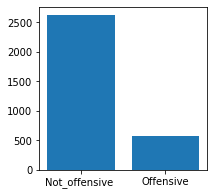

In [15]:
# Class distribution in training set
D = Counter(df_train[0])
plt.rcParams["figure.figsize"] = (3,3)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [16]:
# Min, Max, Avg no of sentences per class in Training set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  567
Max no. of sentences:  2633
Avg no. of sentences:  1600
Median of sentences:  1600.0


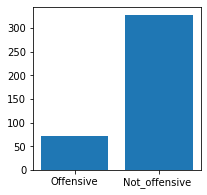

In [17]:
# Class distribution in dev set
D = Counter(df_dev[0])
plt.rcParams["figure.figsize"] = (3,3)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [21]:
# Min, Max, Avg no of sentences per class in dev set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  72
Max no. of sentences:  328
Avg no. of sentences:  200
Median of sentences:  200.0


In [22]:
def tokenize(s: str):
    return s.split()

In [23]:
# variation in length of sentences in train set
len_of_tokens = []
for index, row in df_train.iterrows():
    tokens = tokenize((row[1]).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  186
Avg no. of tokens:  9.0090625
Median of no. of tokens:  8.0


In [25]:
# variation in length of sentences in dev set
len_of_tokens = []
for index, row in df_dev.iterrows():
    tokens = tokenize((row[1]).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  2
Max no. of tokens:  56
Avg no. of tokens:  9.44
Median of no. of tokens:  8.0


In [26]:
# variation in length of sentences in test set
len_of_tokens = []
for index, row in df_test.iterrows():
    tokens = tokenize((row[1]).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  186
Avg no. of tokens:  9.87
Median of no. of tokens:  8.0
